# Predicción de Enfermedades Cardíacas

Este cuaderno explora cómo utilizar bibliotecas de machine learning y ciencia de datos en Python para construir un modelo capaz de predecir si una persona tiene o no una enfermedad cardíaca basándose en atributos clínicos.

## Enfoque del Proyecto
El proceso sigue un flujo estructurado para abordar el problema de predicción:

1. **Definición del Problema**  
2. **Análisis de los Datos**  
3. **Evaluación del Modelo**  
4. **Descripción de las Características**  
5. **Modelado**  
6. **Experimentación y Mejora**  

## 1. Definición del Problema

<div style="padding: 10px; border: 1px solid #E6E6E6; margin-bottom: 16px; border-radius: 5px; background-color: #FAFAFA;">
Dado un conjunto de parámetros clínicos de un paciente, <strong>¿podemos predecir si tiene o no una enfermedad cardíaca?</strong>
</div>

Este problema pertenece al dominio de **clasificación binaria**, ya que la salida solo puede ser una de dos clases: `1` (enfermedad presente) o `0` (enfermedad ausente).

## 2. Datos

**Origen del Conjunto de Datos:**
- **Repositorio Original:**  
[Repositorio de Machine Learning de UCI - Enfermedades Cardíacas](https://archive.ics.uci.edu/ml/datasets/heart+Disease)  

- **Versión en Kaggle:**  
[Kaggle - Dataset de Enfermedades Cardíacas](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset)  

**Estructura de los Datos:**
El conjunto contiene 303 muestras y 14 características clínicas, incluido el atributo `target` que indica la presencia o ausencia de la enfermedad.

## 3. Evaluación

#### Métrica de Éxito:
Para considerar este proyecto viable:  
<div style="padding: 10px; border: 1px solid #E6E6E6; margin: 16px 0; border-radius: 5px; background-color: #FAFAFA;">
<strong>Lograr al menos un 95% de precisión</strong> en la predicción durante la prueba de concepto inicial.
</div>

Esta métrica guía el desarrollo del modelo, aunque podría ajustarse según pruebas posteriores en entornos reales.

## 4. Características

Cada fila del conjunto de datos representa información clínica de un paciente. Las características (o variables) se describen a continuación:

#### Diccionario de Datos

| **Característica** | **Descripción**                                                                 |
|---------------------|---------------------------------------------------------------------------------|
| **age**             | Edad en años                                                                   |
| **sex**             | Género (1 = hombre; 0 = mujer)                                                 |
| **cp**              | Tipo de dolor en el pecho:                                                     |
|                     | - `0`: Angina típica (dolor relacionado con problemas cardíacos).              |
|                     | - `1`: Angina atípica (dolor no relacionado con el corazón).                  |
|                     | - `2`: Dolor no anginal (espasmos esofágicos).                                |
|                     | - `3`: Asintomático.                                                          |
| **trestbps**        | Presión arterial en reposo (mm Hg). Valores > 130-140 son preocupantes.        |
| **chol**            | Colesterol sérico (mg/dl). Valores > 200 indican posibles riesgos.             |
| **fbs**             | Azúcar en sangre en ayunas > 120 mg/dl (1 = sí; 0 = no).                      |
| **restecg**         | Resultados del electrocardiograma en reposo:                                   |
|                     | - `0`: Sin anomalías.                                                         |
|                     | - `1`: Anomalías en onda ST-T.                                                |
|                     | - `2`: Hipertrofia ventricular izquierda.                                     |
| **thalach**         | Frecuencia cardíaca máxima alcanzada.                                          |
| **exang**           | Angina inducida por ejercicio (1 = sí; 0 = no).                               |
| **oldpeak**         | Depresión del segmento ST durante el ejercicio. Indica estrés del corazón.     |
| **slope**           | Pendiente del segmento ST durante el ejercicio máximo:                        |
|                     | - `0`: Ascendente (rara; buen estado).                                        |
|                     | - `1`: Plana (saludable).                                                     |
|                     | - `2`: Descendente (signos de enfermedad).                                    |
| **ca**              | Número de vasos coloreados (0-3) por fluoroscopia.                            |
| **thal**            | Resultado del test de estrés con talio:                                       |
|                     | - `1`, `3`: Normal.                                                           |
|                     | - `6`: Defecto fijo.                                                          |
|                     | - `7`: Defecto reversible.                                                    |
| **target**          | Presencia de enfermedad (1 = sí; 0 = no).                                     |

<div style="padding: 10px; border: 1px solid #E6E6E6; margin: 24px 0; border-radius: 5px; background-color: #FAFAFA;">
<strong>Notas:</strong>
- <strong>Sin información personal identificable (PII):</strong> Este conjunto de datos es anónimo y seguro para su uso público.  
- <strong>Guía:</strong> Guardar esta tabla como referencia en un archivo aparte para consultas futuras.
</div>

## Siguientes Pasos
1. **Explorar el Conjunto de Datos:** Realizar un análisis exploratorio para comprender distribuciones y patrones.  
2. **Preparar los Datos:** Manejar valores faltantes y transformar las características según sea necesario.  
3. **Entrenar el Modelo:** Probar varios algoritmos para determinar cuál es más efectivo.  
4. **Evaluar el Modelo:** Usar métricas relevantes como precisión, recall y F1-score para validar el rendimiento.  
5. **Iterar y Mejorar:** Realizar ajustes en los hiperparámetros y la selección de características para maximizar el desempeño.

## Importar herramientas necesarias

In [1]:
# Importar todas la herramientas

# Regular EDA (analisis exploratorio de los datos) y bibliotecas de gráficos
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Gráficos dentro del cuaderno
%matplotlib inline 

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Modelos de Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluación del modelo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# Imprimir última actualización
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Imprimir versiones de las bibliotecas que estamos usando
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2025-01-05 17:45:46.590962

NumPy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.9.2
Scikit-Learn version: 1.5.1


## Cargar los datos

Existen diversas formas de almacenar datos, especialmente aquellos de tipo tabular, similares a las hojas de cálculo de Excel. Un formato ampliamente utilizado para estos datos es el [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) (Comma-Separated Values).

Otros formatos comunes incluyen:
- [JSON](https://developer.mozilla.org/en-US/docs/Learn_web_development/Core/Scripting/JSON): Utilizado para datos jerárquicos o estructurados. 
- [SQL](https://en.wikipedia.org/wiki/SQL): Diseñado para gestionar y consultar datos en bases de datos relacionales.
- [Parquet](https://parquet.apache.org/): Formato optimizado para grandes volúmenes de datos y procesamiento distribuido. 

**Pandas** ofrece una función específica para leer archivos CSV: `read_csv()`. Es una de las funciones más utilizadas para cargar datos tabulares en Python.

**Nota:** El formato CSV es adecuado para conjuntos de datos pequeños o medianos, pero puede ser ineficiente para grandes volúmenes. En estos casos, es recomendable explorar otros formatos, como Parquet o SQL, para mejorar la eficiencia. Consulta la [documentación oficial de Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html) para conocer todas las opciones disponibles.

- Más funciones de lectura para diferentes formatos de datos en la [sección de Entrada/Salida de la documentación de pandas](https://pandas.pydata.org/docs/reference/io.html).

In [3]:
# Cargar los datos
df = pd.read_csv("../../data/raw/scikit-learn-data/heart-disease.csv")
df.shape # (filas, columnas)

(303, 14)

## Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es el paso inicial tras importar un conjunto de datos, cuyo objetivo principal es familiarizarse con la estructura y características del mismo. No existe una metodología fija, pero se recomienda realizar un análisis detallado que permita identificar patrones, relaciones y posibles problemas en los datos.

**Puntos clave del EDA**
1. **Definir el objetivo del análisis**: ¿Qué pregunta(s) intentas responder con estos datos?
2. **Entender el tipo de datos:** ¿Qué tipo de datos tenemos y cómo tratamos los diferentes tipos? Identifica variables categóricas, numéricas y su relación con la variable objetivo.
3. **Revisar valores faltantes y atípicos:** ¿Qué falta en los datos y cómo lo manejamos? Identifica cómo estos afectan los resultados y decide cómo manejarlos.
4. **Explorar muestras de los datos:** Usa funciones como `head()` y `tail()` para revisar rápidamente las primeras o últimas filas del DataFrame.
5. **Consultar el diccionario de datos:** Asegúrate de comprender el significado de cada columna.
6. **Evaluar transformaciones necesarias:** ¿Cómo puedes agregar, cambiar o eliminar características para obtener más información de tus datos? Considera si es necesario agregar, eliminar o modificar características para mejorar la calidad del análisis.

El objetivo final del EDA es convertirte en un "experto" del conjunto de datos, de manera que puedas entender sus limitaciones, potenciales problemas y patrones generales. Esto es esencial para construir modelos que generalicen correctamente, evitando problemas de sobreajuste o subajuste.

In [4]:
df.head() # Mostrar las primeras 5 filas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail() # Mostrar los último 5 registros

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Nota:** También es buena opción ver de 10 a 100 muestras aleatorias de los datos

In [6]:
# Vamos a averiguar cuántos hay de cada clase
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Dado que estos dos valores son cercanos a la paridad, se puede considerar que nuestra columna objetivo está **balanceada**.

Una columna objetivo **desbalanceada**, es decir, algunas clases tienen muchos más ejemplos, puede ser más difícil de modelar que un conjunto **balanceado**.

En un mundo ideal, todas tus clases objetivo tienen el mismo número de ejemplos.

Si prefieres estos valores en porcentajes, `value_counts()` tiene un parámetro, `normalize`, que se puede establecer en `True`.

In [7]:
# plt.style.available

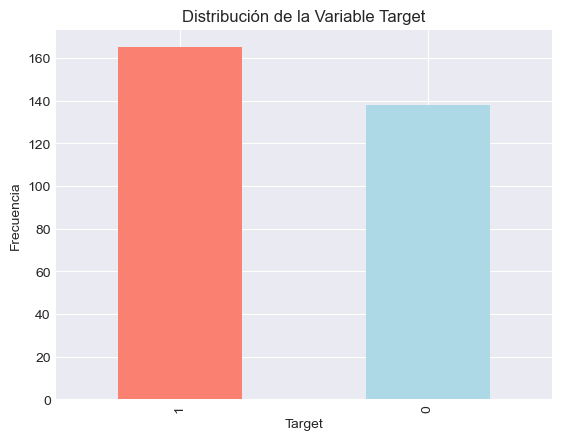

In [8]:
plt.style.use('seaborn-v0_8-darkgrid')
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Distribución de la Variable Target")
plt.xlabel("Target")
plt.ylabel("Frecuencia")
plt.show()

`pd.DataFrame.info()` muestra una visión rápida de la **cantidad de valores faltantes** que tiene el dataset y qué tipo de datos estamos manejando. En nuestro caso, **no hay valores faltantes** y todas nuestras columnas son de naturaleza **numérica.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Comprobar valores faltantes
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Otra forma de obtener información rápida sobre nuestro DataFrame es usar `pd.DataFrame.describe()`.

`describe()` muestra una variedad de métricas diferentes sobre las columnas numéricas, como la media, el máximo y la desviación estándar.

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Frecuencia de Enfermedades del Corazón según el Sexo

**Comparando una característica con otra**
Si deseamos comparar dos columnas entre sí, podemos usar la función `pd.crosstab(index, columns)`.

Esto es útil si queremos empezar a ganar una intuición sobre cómo interactúan las variables independientes con las variables dependientes.

Vamos a comparar la columna objetivo con la columna de sexo.

Para nuestro dataset:
- La columna objetivo (`target`) es 1 = enfermedad cardíaca presente, 0 = sin enfermedad cardíaca.
- La columna `sex` es 1 = masculino, 0 = femenino.

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# Comparar la columna target con la columna sexo
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Dado que hay aproximadamente 100 mujeres y 72 de ellas tienen un valor positivo indicando la presencia de enfermedad cardíaca, podríamos inferir, basándonos en esta única variable, que **si la participante es mujer, hay una probabilidad de ~72%** (72/96 mujeres en nuestro conjunto de datos tienen enfermedad cardíaca) **de que tenga enfermedad cardíaca.**

En cuanto a los hombres, hay aproximadamente 200 en total, con cerca de la mitad (93/207) indicando la presencia de enfermedad cardíaca.

Por lo tanto, podríamos predecir que **si el participante es hombre, el 50% de las veces tendrá enfermedad cardíaca.**

Promediando estos dos valores, podemos asumir, basándonos únicamente en este parámetro, que si hay una persona, existe un 62.5% de probabilidad de que tenga enfermedad cardíaca.

Esta puede ser nuestra línea base muy simple, que intentaremos superar con machine learning.

**Nota**: Una línea base es un modelo simple o una estimación inicial con la que comienzas y tratas de superar o confirmar a lo largo de tus experimentos. Puede ser tan simple como observar los datos, como lo hemos hecho, y crear una heurística predictiva para avanzar.

#### Comparación visual

Voy a introducirte un lema que siempre me recuerdo cuando estoy explorando datos:

**¡Visualiza, visualiza, visualiza!** - El lema del explorador de datos.

Esto se debe a que es muy útil, siempre que estés trabajando con un nuevo conjunto de datos, visualizar tanto como puedas para construir una idea mental del conjunto de datos.

Y una de las mejores formas de crear visualizaciones es hacer gráficos (representaciones gráficas de nuestros datos).

Podemos graficar nuestra comparación de `pd.crosstab` llamando al método `plot()` y pasándole algunos parámetros:

- **`kind`**: El tipo de gráfico que deseas (por ejemplo, `"bar"` para un gráfico de barras).
- **`figsize=(largo, ancho)`**: Qué tan grande quieres que sea el gráfico.
- **`color=[color_1, color_2]`**: Los diferentes colores que te gustaría usar.

Diferentes métricas se representan mejor con diferentes tipos de gráficos.

En nuestro caso, un gráfico de barras es ideal. Veremos ejemplos de más tipos de gráficos más adelante. Y con algo de práctica, desarrollarás una intuición sobre qué gráfico usar con diferentes variables.

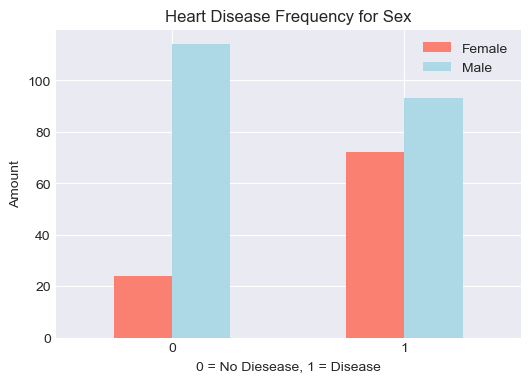

In [14]:
# Crear un gráfica del crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(6, 4),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show();

### Edad vs. Frecuencia Cardíaca Máxima para Enfermedades del Corazón

Intentemos combinar un par de variables independientes, como `age` (edad) y `thalach` (frecuencia cardíaca máxima), y luego compararlas con nuestra variable objetivo `heart disease` (enfermedad cardíaca).

Dado que hay muchos valores diferentes para `age` y `thalach`, usaremos un gráfico de dispersión (*scatter plot*).

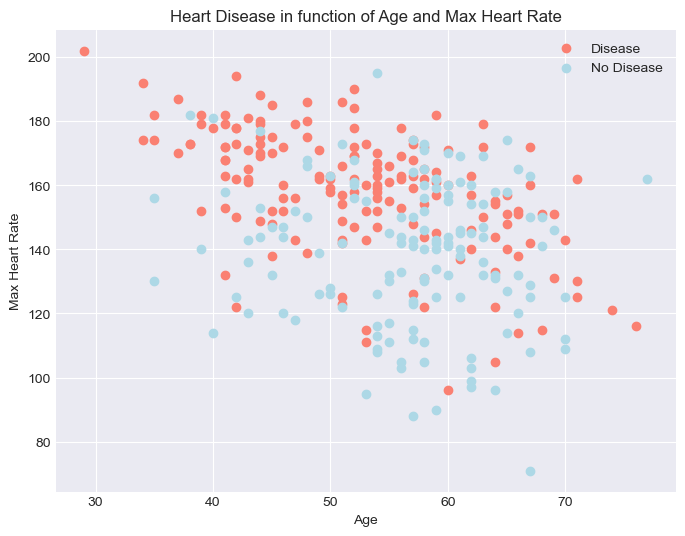

In [15]:
# Crear otra figura
plt.figure(figsize=(8, 6))

# Dispersión con ejemplos positivos
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Dispersión con ejemplos negativos
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Agregar información útil
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show();

Parece que, cuanto más joven es alguien, mayor es su frecuencia cardíaca máxima (los puntos están más altos en la parte izquierda del gráfico). Además, parece que podría haber más enfermedades cardíacas en la población joven (más puntos naranjas).

Ambas son observaciones, por supuesto, pero esto es lo que estamos tratando de hacer: construir una comprensión de los datos.

Revisemos la **distribución** de la edad.

> **Nota:** La distribución puede considerarse como la dispersión de los datos, es decir, al observarlos como un todo, ¿qué valores diferentes aparecen en los datos?

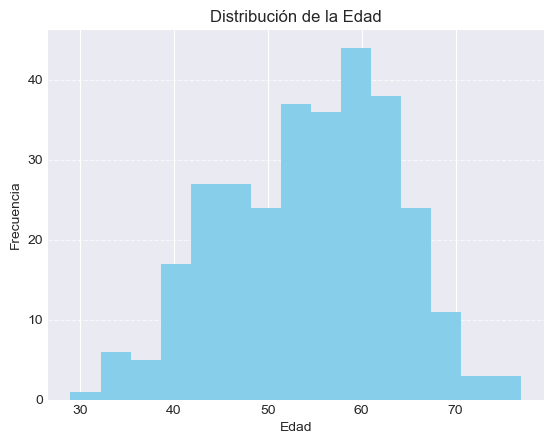

In [16]:
# Crear un histograma de la columna "age"
df.age.plot.hist(color="skyblue", bins=15)
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Podemos ver que es una **distribución normal, pero ligeramente inclinada hacia la derecha,** lo cual se refleja en el gráfico de dispersión anterior.

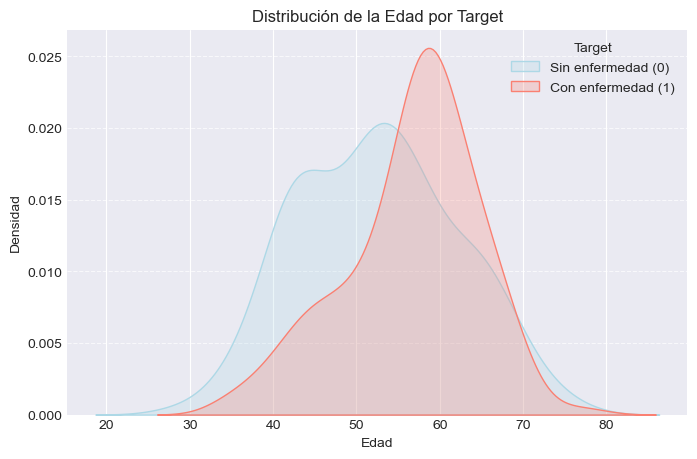

In [17]:
# Crear un gráfico de densidad para la distribución de edad por target
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="age", hue="target", fill=True, palette=["salmon", "lightblue"])
plt.title("Distribución de la Edad por Target")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend(title="Target", labels=["Sin enfermedad (0)", "Con enfermedad (1)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Frecuencia de Enfermedades Cardíacas según el Tipo de Dolor en el Pecho

Intentemos comparar otra variable independiente con nuestra variable objetivo.

Esta vez usaremos `cp` (tipo de dolor torácico) como la variable independiente.

Usaremos el mismo proceso que antes con la variable `sex`.

**cp** - tipo de dolor en el pecho:  
- **0**: Angina típica: dolor en el pecho relacionado con una disminución del suministro de sangre al corazón.  
- **1**: Angina atípica: dolor en el pecho no relacionado con el corazón.  
- **2**: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón).  
- **3**: Asintomático: dolor en el pecho sin signos de enfermedad.  

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


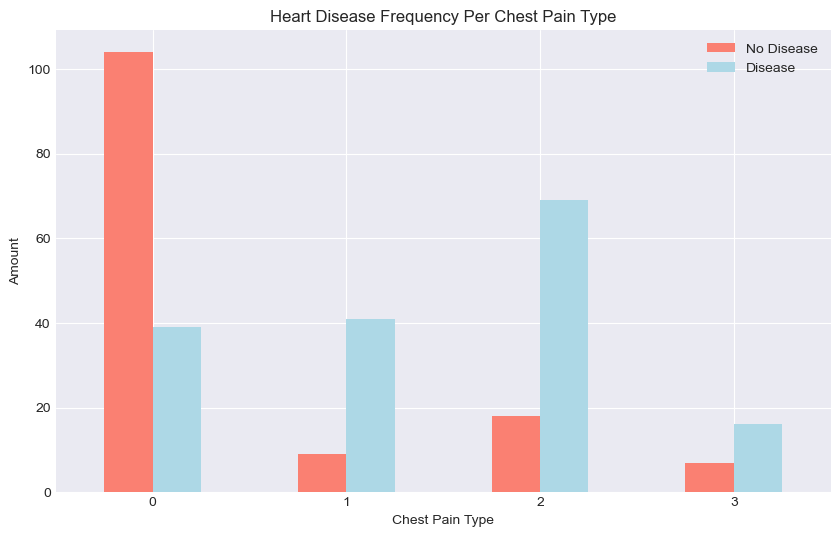

In [19]:
# Hacer el crosstab más visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show();

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Hacer amtriz de correlación
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [22]:
# Hagamos que nuestra matriz de correlación sea un poco más bonita
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(14.5, -0.5)

## 5. Modelado 

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Dividir los datos en X & y
X = df.drop("target", axis=1)

y = df["target"]

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# Dividir los datos en conjuntos de train y test
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Ahora que hemos dividido nuestros datos en conjuntos de entrenamiento y prueba, es momento de construir un modelo de machine learning.

Entrenaremos el modelo (encontraremos los patrones) en el conjunto de entrenamiento.

Y lo probaremos (utilizaremos los patrones) en el conjunto de prueba.

Vamos a probar 3 modelos de machine learning diferentes:
1. Regresión Logística  
2. Clasificador de Vecinos más Cercanos (K-Nearest Neighbours Classifier)  
3. Clasificador de Bosque Aleatorio (Random Forest Classifier)

In [30]:
# Colocar modelos en un diccionario
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Crear una función para ajustar y puntuar modelos
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Ajusta y evalúa los modelos de aprendizaje automático dados.
    modelos : un diccionario de diferentes modelos de aprendizaje automático de Scikit-Learn
    X_entrenamiento : datos de entrenamiento (sin etiquetas)
    X_prueba : datos de prueba (sin etiquetas)
    y_entrenamiento : etiquetas de entrenamiento
    y_prueba : etiquetas de prueba
    """
    # Establecer semilla aleatoria
    np.random.seed(42)
    # Hacer un diccionario para mantener las puntuaciones de los modelos
    model_scores = {}
    # Iterar a través de los modelos
    for name, model in models.items():
        # Ajustar el modelo a los datos
        model.fit(X_train, y_train)
        # Evaluar el modelo y agregar su puntuación a model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
# Estandarización o normalización de características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_scaled,
                             X_test=X_test_scaled,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8360655737704918}

### Comparación de modelos

In [33]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Ahora tenemos un modelo base... y sabemos que las primeras predicciones de un modelo no siempre son en las que deberíamos basar nuestros próximos pasos. ¿Qué deberíamos hacer?

Veamos lo siguiente:

- Ajuste de hiperparámetros  
- Importancia de características  
- Matriz de confusión  
- Validación cruzada  
- Precisión  
- Recall  
- Puntaje F1  
- Informe de clasificación  
- Curva ROC  
- Área bajo la curva (AUC)  

### Ajuste de hiperparámetros (a mano)

In [34]:
# Ajustar KNN
train_scores = []
test_scores = []

# Crear una lista de diferentes valores para n_neighbors
neighbors = range(1, 21)

# Configurar la instancia de KNN
knn = KNeighborsClassifier()

# Iterar a través de diferentes n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Ajustar el algoritmo
    knn.fit(X_train, y_train)
    
    # Actualizar la lista de scores de entrenamiento
    train_scores.append(knn.score(X_train, y_train))
    
    # Actualizar la lista de scores de prueba
    test_scores.append(knn.score(X_test, y_test))

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [37]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Puntuación máxima de KNN en los datos de prueba: {max(test_scores)*100:.2f}%")

Puntuación máxima de KNN en los datos de prueba: 75.41%


### Ajuste de hiperparámetros con RandomizedSearchCV

Vamos a ajustar:
* LogisticRegression()
* RandomForestClassifier()

... usando RandomizedSearchCV

In [38]:
# Crear una cuadrícula de hiperparámetros para LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Crear una cuadrícula de hiperparámetros para RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Ahora que tenemos configuradas las cuadrículas de hiperparámetros para cada uno de nuestros modelos, ajustémoslos utilizando RandomizedSearchCV...

In [39]:
# Ajustar LogisticRegression

np.random.seed(42)

# Configuración de búsqueda aleatoria de hiperparámetros para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Ajustar el modelo de búsqueda aleatoria de hiperparámetros para LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Después de ajustar LogisticRegression(), haremos lo mismo con RandomForestClassifier()...

In [42]:
# Establecer semilla aleatoria
np.random.seed(42)

# Configuración de búsqueda aleatoria de hiperparámetros para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Ajustar el modelo de búsqueda aleatoria de hiperparámetros para RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
# Encontrar los mejores hiperparámetros
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
# Evaluar el modelo de RandomForestClassifier con búsqueda aleatoria
rs_rf.score(X_test, y_test)

0.8688524590163934

### Ajuste de hiperparámetros con GridSearchCV

Dado que nuestro modelo de LogisticRegression proporciona los mejores resultados hasta ahora, intentaremos mejorarlos nuevamente usando GridSearchCV...

In [45]:
# Diferentes hiperparámetros para nuestro modelo LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Configurar la búsqueda de hiperparámetros con GridSearchCV para LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Ajustar el modelo
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [46]:
# Ver los mejores hiperparámetros
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# Evaluar el modelo
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluación del clasificador ajustado

* ROC curve and AUC score (Curva ROC y métrica AUC)
* Confusion matrix (Matriz de confusión)
* Classification report (Informe de clasificación)
* Precision
* Recall
* F1-score

... y sería ideal utilizar validación cruzada siempre que sea posible.

Para realizar comparaciones y evaluar nuestro modelo entrenado, primero necesitamos realizar predicciones. Dado que nuestro modelo LogisticRegression proporciona las mejores métricas hasta ahora, intentaremos mejorarlas nuevamente utilizando GridSearchCV...

In [48]:
# Hacer predicciones con tuned model
y_preds = gs_log_reg.predict(X_test)

In [49]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [50]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [51]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [52]:
# Matriz de confusión
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [53]:
def plot_conf_mat(y_test, y_preds):
    """
    Grafica una matriz de confusión con buen aspecto utilizando el heatmap() de Seaborn.
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    
plot_conf_mat(y_test, y_preds)

Ahora que tenemos una curva ROC, una métrica AUC y una matriz de confusión, obtengamos también un informe de clasificación junto con precisión, recall y puntaje F1 validados cruzadamente.

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calcular métricas de evaluación utilizando validación cruzada

Vamos a calcular la precisión, la exactitud, el recall y el f1-score de nuestro modelo utilizando validación cruzada y para ello usaremos `cross_val_score()`.

In [55]:
# Ver mejores hiperparámetros
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# Crear un nuevo clasificador con los mejores parámetros
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [57]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [58]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [59]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [60]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [61]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [62]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Importancia de características (Feature Importance)

La importancia de características es otra manera de preguntar: "¿Qué características contribuyeron más a los resultados del modelo y cómo contribuyeron?"

Determinar la importancia de características varía para cada modelo de machine learning. Una forma de encontrar la importancia de características es buscar "importancia de características (NOMBRE DEL MODELO)".

Vamos a encontrar la importancia de características para nuestro modelo de LogisticRegression...

In [63]:
# Ajustar una instancia de LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [64]:
# Comprobar coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# Coincidir los coeficientes de las características con las columnas
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

In [67]:
# Visualizar feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [68]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [69]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - la pendiente del segmento ST del ejercicio pico
* 0: Ascendente: mejor frecuencia cardíaca con el ejercicio (poco común)
* 1: Plano: cambio mínimo (corazón sano típico)
* 2: Descendente: signos de un corazón no saludable

## 6. Experimentación 

Si aún no has alcanzado tu métrica de evaluación... pregúntate...  

* ¿Podrías recopilar más datos?  
* ¿Podrías probar un mejor modelo? ¿Como CatBoost o XGBoost?  
* ¿Podrías mejorar los modelos actuales? (más allá de lo que hemos hecho hasta ahora)  

Si tu modelo es lo suficientemente bueno (has alcanzado tu métrica de evaluación), ¿cómo lo exportarías y lo compartirías con otros?